In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.patches import Ellipse
import matplotlib.patches as patches
import librosa

%run graphing_function_recent.ipynb

In [2]:
#Use this for all adjustable values 
#input file paths here (include .csv):
video_path = r'\\10.25.16.5\yaochen\Active\DLC\Final_Models\Lindsey\escape_behavior_2-lindsey_christinger-2024-06-13_v1\D1D2\coords_csv\Coordcontrol3_P2_7_18_24_videoDLC_resnet50_escape_behavior_2Jun13shuffle1_1030000_filtered_day.csv'
time_path = r'\\10.25.16.5\yaochen\Active\Lindsey\set_up_testing\D1D2\Control\video_time\control3_P2_7_18_24_video_time0.csv'
audio_path = r'\\10.25.16.5\yaochen\Active\Lindsey\set_up_testing\D1D2\Control\stimulus_time\control3_P2_7_18_24_stimulus_time0.csv'

north_pixel = 96
south_pixel = 414
east_pixel = 487
west_pixel = 145
shelter_x_pixel = 171
shelter_y_pixel = 245

#estimate for when mouse reaches shelter
escape_done = 15 #time mouse reaches shelter location

In [3]:
#manually decide?
escape_response = True
freezing_response = False
##small_angle = 

In [4]:
#read in DLC data, convert to cm, center platform at 0,0
shelter_x, shelter_y, x_diam, y_diam, coord_scaled = single_mouse_data(north_pixel, south_pixel, east_pixel, west_pixel, shelter_x_pixel, shelter_y_pixel, video_path)

In [5]:
#replace any head, nose, or center points with likelihood < .9 with NA
filter_data(.8, coord_scaled)

In [6]:
#coord_filtered

In [7]:
timestamp_df = convert_time(time_path, coord_scaled, audio_path, 2)

In [8]:
coord_scaled.tail()

,Unnamed: 0,frames,nose_x,nose_y,nose_likelihood,head_x,head_y,head_likelihood,earRight_x,earRight_y,...,center_x,center_y,center_likelihood,spine2_x,spine2_y,spine2_likelihood,spine3_x,spine3_y,spine3_likelihood,time_set
12092,12092,12092,-0.138170,25.337298,0.998670,-1.175403,25.159506,0.999984,-1.621027,25.908637,...,-3.180888,23.685791,0.999923,-4.184526,22.667242,0.999998,-4.904628,21.801646,0.999929,28.122599
12093,12093,12093,-0.272377,25.750661,0.996879,-1.222231,25.273308,0.999982,-1.744669,25.899025,...,-3.180888,23.676559,0.999928,-4.158110,22.636906,0.999998,-4.904628,21.768167,0.999939,28.161895
12094,12094,12094,-0.272377,26.179109,0.997412,-1.222231,25.375373,0.999985,-1.744669,25.925274,...,-3.113899,23.676559,0.999947,-4.133725,22.636906,0.999999,-4.904628,21.766287,0.999945,28.201447
12095,12095,12095,-0.284325,26.179109,0.997590,-1.228627,25.375373,0.999985,-1.790196,25.925274,...,-3.113899,23.662562,0.999950,-4.133725,22.622207,0.999998,-4.904628,21.763887,0.999926,28.241920
12096,12096,12096,-0.354461,26.179109,0.998181,-1.263137,25.375373,0.999978,-1.857109,25.888511,...,-3.113899,23.662562,0.999966,-4.133725,22.622207,0.999998,-4.904628,21.763846,0.999928,28.281869


In [9]:
#REPLACE ONCE WE HAVE STIMULUS TIMESTAMPS
#returns start and stop times of stimulus.
#start, stimulus_end = audio_timing(stimulus_start, stimulus_end, audio_path, coord_scaled['time'].iloc[-1])

In [10]:
#find time stimulus ends and mouse reaches shelter(escape) if stimulus is set to 0s
#end, escape = time_set_zero(start, stimulus_end, escape_done, coord_scaled)

In [11]:
#calculate displacement as 'displacement'
displacement(shelter_x, shelter_y, coord_scaled)

In [12]:
#calculate speed as 'speed' and change in displacement as 'delta_vector'
total_distance = speed(coord_scaled)

In [13]:
#calculate head angle as 'head_angle'
angle(shelter_x, shelter_y, coord_scaled)

In [14]:
#calculate head angle speed as 'angle_speed'
angle_speed(coord_scaled)

In [15]:
#create dataframes isolated to 4 ranges: just shelter reaching, 3 seconds before and 6 after, 2 before and 4 after, and 1 where you can input your own parameters
#return 4 dataframes 
escape_only, four_second, six_second, long_range, escape_estimate = dataframe_ranges(-7, 14, escape_done,coord_scaled)

In [16]:
escape_only

,Unnamed: 0,frames,nose_x,nose_y,nose_likelihood,head_x,head_y,head_likelihood,earRight_x,earRight_y,...,spine2_likelihood,spine3_x,spine3_y,spine3_likelihood,time_set,displacement,speed,delta_vector,head_angle,angle_speed
11390,11390,11390,6.101858,1.773364,0.998503,4.355252,1.792273,0.999987,4.248010,2.632509,...,0.999988,-1.877771,1.968566,0.999985,0.034420,27.558906,0.000000,0.000000,3.008587,-3.219944
11391,11391,11391,6.083488,1.539251,0.999585,4.281447,1.726257,0.999981,4.169149,2.566101,...,0.999990,-1.877771,1.989459,0.999991,0.074407,27.519077,1.004460,0.040165,2.917869,-2.268672
11392,11392,11392,6.083488,1.519248,0.999681,4.207425,1.695008,0.999975,4.115871,2.560862,...,0.999989,-1.877771,2.026749,0.999989,0.114791,27.454703,1.607591,0.064921,2.928592,0.265507
11393,11393,11393,5.925902,1.403391,0.999328,4.061368,1.691192,0.999981,4.003796,2.528636,...,0.999987,-1.877771,2.045224,0.999990,0.155418,27.444668,0.403565,0.016396,2.868406,-1.481420
11394,11394,11394,5.801405,1.350653,0.999724,3.971779,1.523919,0.999986,3.933366,2.450251,...,0.999976,-1.999579,2.308514,0.999986,0.194573,27.323192,3.112985,0.121889,2.932306,1.631973
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11650,11650,11650,-11.340388,-10.387620,0.999681,-13.254876,-11.553939,0.999997,-13.589154,-10.908389,...,0.999998,-15.977211,-15.131079,0.999995,10.436980,15.698600,4.524465,0.179766,1.941859,-2.614950
11651,11651,11651,-11.208094,-9.935920,0.999597,-13.010278,-11.162265,0.999996,-13.483700,-10.647371,...,0.999996,-15.696364,-14.874823,0.999994,10.477069,15.657879,9.128914,0.365969,1.920560,-0.531288
11652,11652,11652,-11.021727,-9.474147,0.999589,-12.661217,-10.837544,0.999988,-13.289846,-10.426792,...,0.999982,-15.511393,-14.534126,0.999998,10.517095,15.727760,11.329882,0.453490,1.853693,-1.670583
11653,11653,11653,-10.990802,-8.831258,0.999736,-12.451210,-10.280720,0.999978,-12.999838,-9.819682,...,0.999992,-15.496498,-13.884847,0.999998,10.557453,15.634882,11.603570,0.468297,1.802410,-1.270713


<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

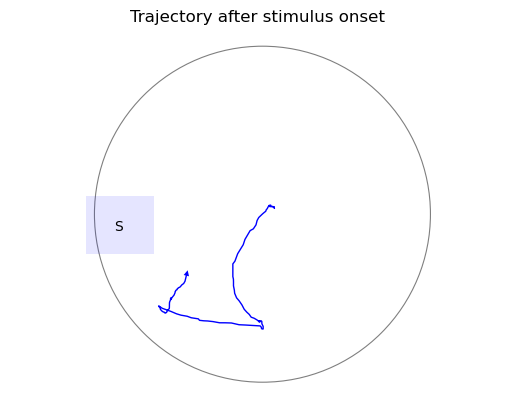

In [17]:
trajectory(shelter_x, shelter_y, x_diam, y_diam, escape_only)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

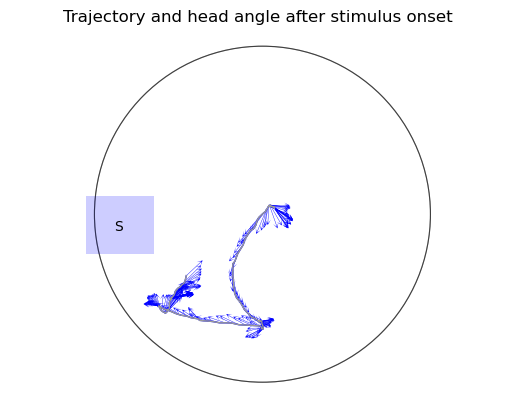

In [18]:
head_angle_trajectory_figure(shelter_x, shelter_y, x_diam, y_diam, escape_only)

In [19]:
escape_only

,Unnamed: 0,frames,nose_x,nose_y,nose_likelihood,head_x,head_y,head_likelihood,earRight_x,earRight_y,...,spine2_likelihood,spine3_x,spine3_y,spine3_likelihood,time_set,displacement,speed,delta_vector,head_angle,angle_speed
11390,11390,11390,6.101858,1.773364,0.998503,4.355252,1.792273,0.999987,4.248010,2.632509,...,0.999988,-1.877771,1.968566,0.999985,0.034420,27.558906,0.000000,0.000000,3.008587,-3.219944
11391,11391,11391,6.083488,1.539251,0.999585,4.281447,1.726257,0.999981,4.169149,2.566101,...,0.999990,-1.877771,1.989459,0.999991,0.074407,27.519077,1.004460,0.040165,2.917869,-2.268672
11392,11392,11392,6.083488,1.519248,0.999681,4.207425,1.695008,0.999975,4.115871,2.560862,...,0.999989,-1.877771,2.026749,0.999989,0.114791,27.454703,1.607591,0.064921,2.928592,0.265507
11393,11393,11393,5.925902,1.403391,0.999328,4.061368,1.691192,0.999981,4.003796,2.528636,...,0.999987,-1.877771,2.045224,0.999990,0.155418,27.444668,0.403565,0.016396,2.868406,-1.481420
11394,11394,11394,5.801405,1.350653,0.999724,3.971779,1.523919,0.999986,3.933366,2.450251,...,0.999976,-1.999579,2.308514,0.999986,0.194573,27.323192,3.112985,0.121889,2.932306,1.631973
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11650,11650,11650,-11.340388,-10.387620,0.999681,-13.254876,-11.553939,0.999997,-13.589154,-10.908389,...,0.999998,-15.977211,-15.131079,0.999995,10.436980,15.698600,4.524465,0.179766,1.941859,-2.614950
11651,11651,11651,-11.208094,-9.935920,0.999597,-13.010278,-11.162265,0.999996,-13.483700,-10.647371,...,0.999996,-15.696364,-14.874823,0.999994,10.477069,15.657879,9.128914,0.365969,1.920560,-0.531288
11652,11652,11652,-11.021727,-9.474147,0.999589,-12.661217,-10.837544,0.999988,-13.289846,-10.426792,...,0.999982,-15.511393,-14.534126,0.999998,10.517095,15.727760,11.329882,0.453490,1.853693,-1.670583
11653,11653,11653,-10.990802,-8.831258,0.999736,-12.451210,-10.280720,0.999978,-12.999838,-9.819682,...,0.999992,-15.496498,-13.884847,0.999998,10.557453,15.634882,11.603570,0.468297,1.802410,-1.270713


<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

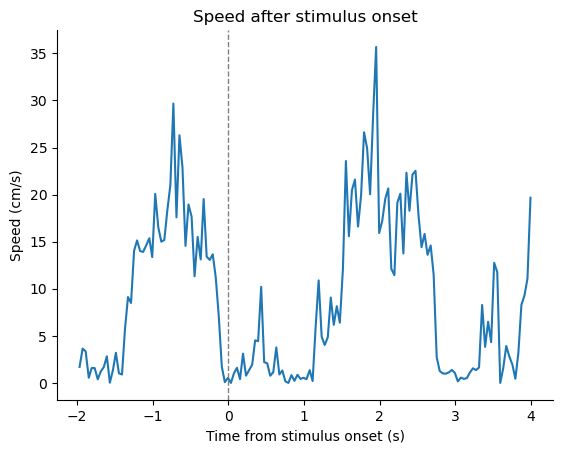

In [20]:
speed_figure(four_second['time_set'].iloc[-1],4, four_second)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

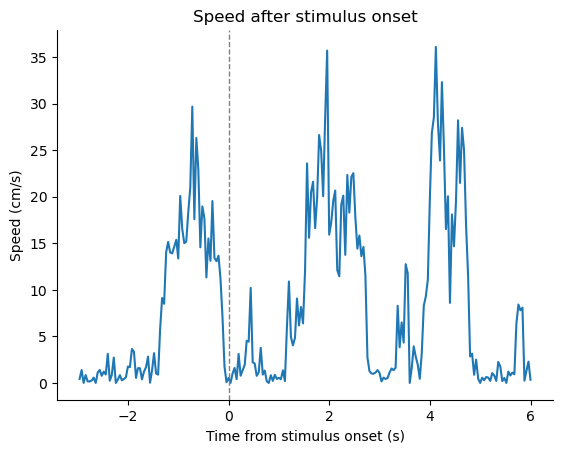

In [21]:
speed_figure(six_second['time_set'].iloc[-1],4, six_second)


<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

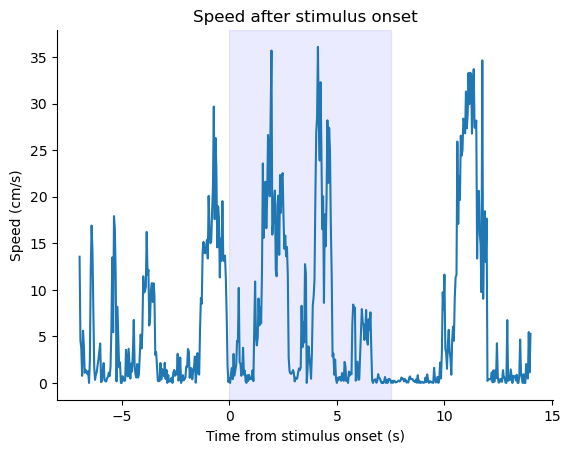

In [22]:
speed_figure(7.5,9, long_range)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

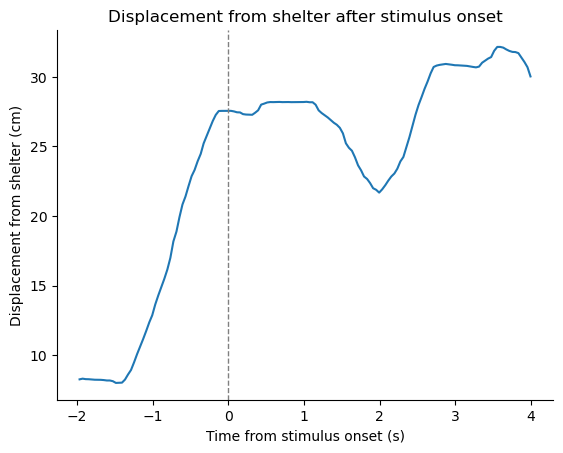

In [23]:
displacement_figure(four_second['time_set'].iloc[-1],4, four_second)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

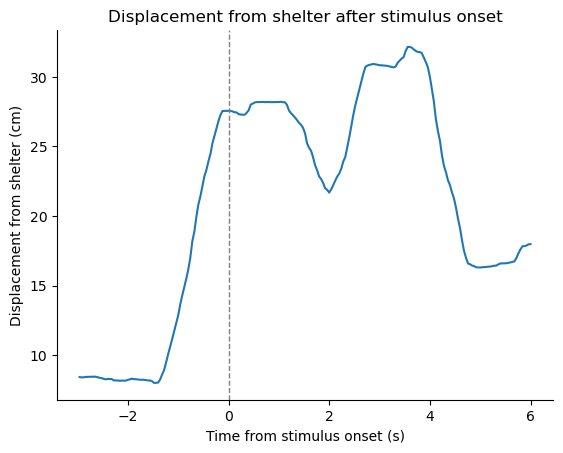

In [24]:
displacement_figure(six_second['time_set'].iloc[-1],4, six_second)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

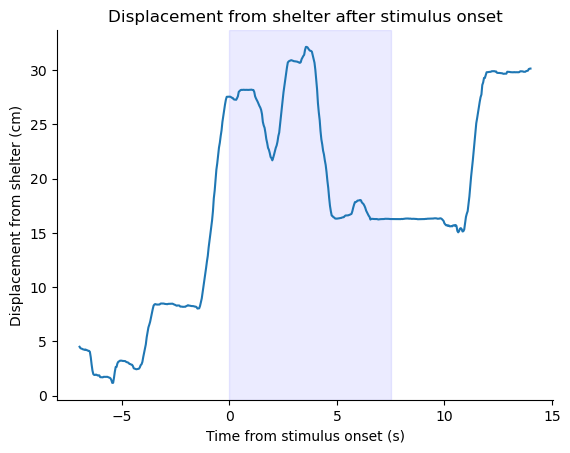

In [25]:
displacement_figure(7.5,9, long_range)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

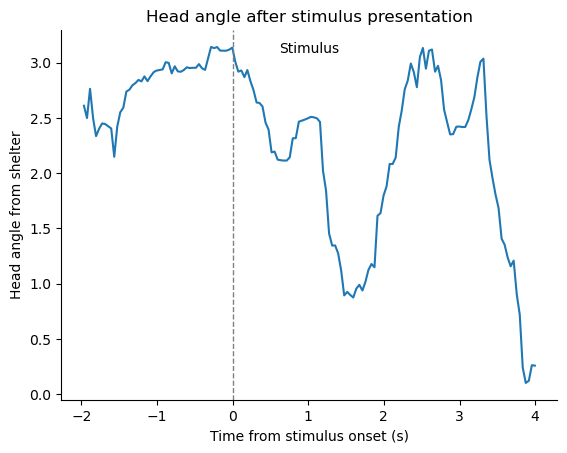

In [26]:
head_angle_figure(four_second['time_set'].iloc[-1],4, four_second)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

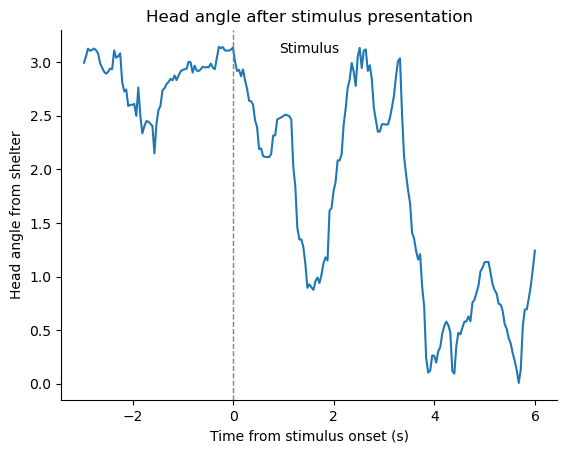

In [27]:
head_angle_figure(six_second['time_set'].iloc[-1],4, six_second)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

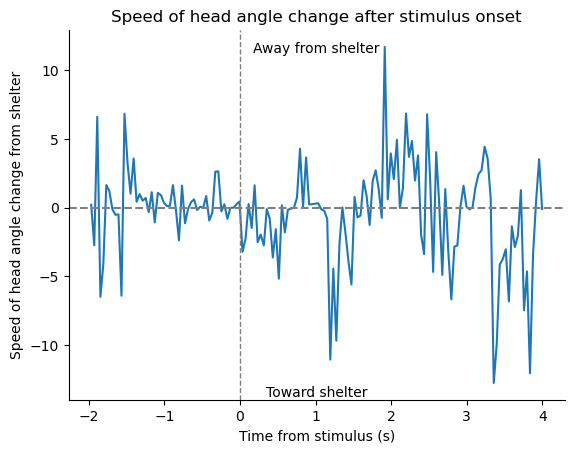

In [28]:
angle_speed_figure(four_second['time_set'].iloc[-1], 4,four_second)

In [29]:
ratio, initial_displacement, total_distance = linearity_ratio(escape_only)

In [30]:
#shelter_rotation(shelter_x, shelter_y, escape_only)

In [31]:
escape_only

,Unnamed: 0,frames,nose_x,nose_y,nose_likelihood,head_x,head_y,head_likelihood,earRight_x,earRight_y,...,spine2_likelihood,spine3_x,spine3_y,spine3_likelihood,time_set,displacement,speed,delta_vector,head_angle,angle_speed
11390,11390,11390,6.101858,1.773364,0.998503,4.355252,1.792273,0.999987,4.248010,2.632509,...,0.999988,-1.877771,1.968566,0.999985,0.034420,27.558906,0.000000,0.000000,3.008587,-3.219944
11391,11391,11391,6.083488,1.539251,0.999585,4.281447,1.726257,0.999981,4.169149,2.566101,...,0.999990,-1.877771,1.989459,0.999991,0.074407,27.519077,1.004460,0.040165,2.917869,-2.268672
11392,11392,11392,6.083488,1.519248,0.999681,4.207425,1.695008,0.999975,4.115871,2.560862,...,0.999989,-1.877771,2.026749,0.999989,0.114791,27.454703,1.607591,0.064921,2.928592,0.265507
11393,11393,11393,5.925902,1.403391,0.999328,4.061368,1.691192,0.999981,4.003796,2.528636,...,0.999987,-1.877771,2.045224,0.999990,0.155418,27.444668,0.403565,0.016396,2.868406,-1.481420
11394,11394,11394,5.801405,1.350653,0.999724,3.971779,1.523919,0.999986,3.933366,2.450251,...,0.999976,-1.999579,2.308514,0.999986,0.194573,27.323192,3.112985,0.121889,2.932306,1.631973
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11650,11650,11650,-11.340388,-10.387620,0.999681,-13.254876,-11.553939,0.999997,-13.589154,-10.908389,...,0.999998,-15.977211,-15.131079,0.999995,10.436980,15.698600,4.524465,0.179766,1.941859,-2.614950
11651,11651,11651,-11.208094,-9.935920,0.999597,-13.010278,-11.162265,0.999996,-13.483700,-10.647371,...,0.999996,-15.696364,-14.874823,0.999994,10.477069,15.657879,9.128914,0.365969,1.920560,-0.531288
11652,11652,11652,-11.021727,-9.474147,0.999589,-12.661217,-10.837544,0.999988,-13.289846,-10.426792,...,0.999982,-15.511393,-14.534126,0.999998,10.517095,15.727760,11.329882,0.453490,1.853693,-1.670583
11653,11653,11653,-10.990802,-8.831258,0.999736,-12.451210,-10.280720,0.999978,-12.999838,-9.819682,...,0.999992,-15.496498,-13.884847,0.999998,10.557453,15.634882,11.603570,0.468297,1.802410,-1.270713


In [32]:
likelihood_data, likelihood_minus_nose, likelihood_center = likelihood_check(0, 8, .9, coord_scaled)

In [33]:
likelihood_data #need to adjust time frame to be useful 

,Unnamed: 0,frames,nose_x,nose_y,nose_likelihood,head_x,head_y,head_likelihood,earRight_x,earRight_y,...,spine2_likelihood,spine3_x,spine3_y,spine3_likelihood,time_set,displacement,speed,delta_vector,head_angle,angle_speed
11423,11423,11423,0.451517,-2.208630,0.628457,0.750219,-0.468654,0.999593,1.515423,-0.633374,...,0.999599,-0.772084,3.790196,0.999943,1.354996,26.890550,9.065872,0.357413,1.346368,0.020015
11424,11424,11424,-0.293685,-2.371482,0.570394,0.171406,-0.480570,0.999298,0.968976,-0.661297,...,0.995756,-0.480884,3.616695,0.999339,1.394727,26.706757,6.172472,0.245238,1.274456,-1.809967
11425,11425,11425,-1.038887,-2.534335,0.612749,-0.179712,-0.480570,0.988480,0.635694,-1.237814,...,0.988629,-0.455209,3.280301,0.998672,1.434752,26.559441,8.150774,0.326235,1.118660,-3.892462
11427,11427,11427,-2.267858,-3.249758,0.998199,-1.121826,-1.695269,0.999903,-0.479894,-2.186800,...,0.996644,-0.229142,2.922329,0.998437,1.515431,25.943067,12.075692,0.491372,0.926500,0.782187
11474,11474,11474,0.805867,-22.001099,0.788392,0.861652,-21.271583,0.999905,1.664289,-21.304492,...,0.999937,-2.577499,-17.411862,0.999992,3.395546,31.160983,3.826655,0.150717,2.121251,-9.940950
11475,11475,11475,0.279392,-22.379047,0.296831,0.501416,-21.523191,0.999764,1.353575,-21.544816,...,0.999922,-2.436635,-17.411862,0.999990,3.435264,31.310808,6.498360,0.258102,1.956383,-4.150962


In [34]:

rotate, shelter_rotate_x, shelter_rotate_y = rotate_trajectory(shelter_x, shelter_y, escape_only)
normalized_df, shelter_normalized_x, shelter_normalized_y, combined_range = normalize_rotation(rotate, shelter_rotate_x, shelter_rotate_y)


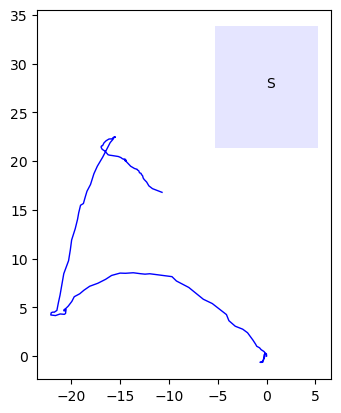

In [35]:

fig = plt.figure()  #create figure to fill in
ax = plt.axes()
    
    #make x and y scales equal - present as a circle


    #plot the center x and y coordinates
x = rotate['rotated_x']
y = rotate['rotated_y']

ax.text(shelter_rotate_x,shelter_rotate_y, 'S', color = 'black', size = 10)
shelter = patches.Rectangle(((shelter_rotate_x - 5.25), (shelter_rotate_y-6.25)), 10.5,12.5,  linewidth = .8, edgecolor = 'none', facecolor = 'blue', alpha = .1)
ax.add_patch(shelter)

ax.set_aspect('equal')
ax.plot(x,y, color = 'blue', linewidth = 1)


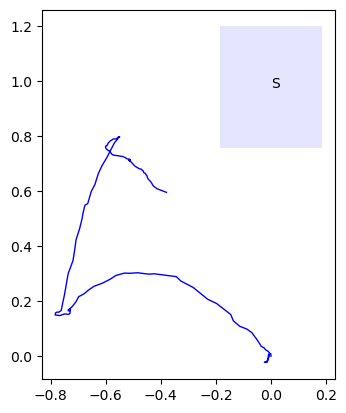

In [36]:

fig = plt.figure()  #create figure to fill in
ax = plt.axes()
    
x = normalized_df['x']
y = normalized_df['y']

ax.text(shelter_normalized_x,shelter_normalized_y, 'S', color = 'black', size = 10)
shelter = patches.Rectangle(((shelter_normalized_x - 5.25/combined_range), (shelter_normalized_y-6.25/combined_range)), 10.5/combined_range,12.5/combined_range,  linewidth = .8, edgecolor = 'none', facecolor = 'blue', alpha = .1)
ax.add_patch(shelter)

ax.set_aspect('equal')
ax.plot(x,y, color = 'blue', linewidth = 1)
    

